In [2]:
from pybursts import pybursts
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [4]:
offsets = np.array([4, 17, 23, 27, 33, 35, 37, 76, 77, 82, 84, 88, 90, 92]) + 0.01
output = pybursts.kleinberg(offsets, s=2, gamma=0.1)
output

array([[0, 4.01, 92.01],
       [1.0, 33.01, 37.01],
       [1.0, 76.01, 92.01],
       [2.0, 76.01, 77.01]], dtype=object)

# Output
An array of intervals in which a burst of activity was detected. The first column denotes the level within the hierarchy; the second column the start value of the interval; the third column the end value. The first row is always the top-level activity (the complete interval from start to finish).

In [5]:
print(output)

[[0 4.01 92.01]
 [1.0 33.01 37.01]
 [1.0 76.01 92.01]
 [2.0 76.01 77.01]]


In [6]:
burst_level = output[1:, 0]
unique_burst_levels = np.unique(burst_level)


t_starts = output[1:,1]
t_ends = output[1:,2]
t_durations = t_ends - t_starts
t_durations

# Convert vectors to tuples of (t_start, t_duration) pairs:
interval_pairs = list(zip(t_starts, t_durations))
print(f'interval_pairs: {interval_pairs}') # [(33, 4), (76, 16), (76, 1)]

y_range = [(i, 1) for i in np.arange(len(interval_pairs))]
print(f'y_range: {y_range}')
y_range[0]

interval_pairs: [(33.01, 4.0), (76.01, 16.0), (76.01, 1.0)]
y_range: [(0, 1), (1, 1), (2, 1)]


(0, 1)

In [ ]:
plt.plot(output)

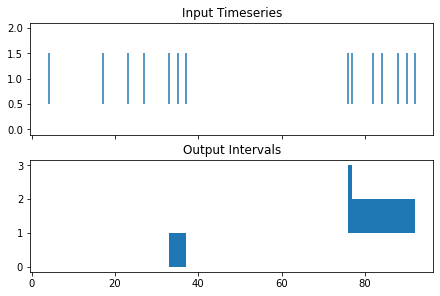

In [7]:
fig, (ax0, ax1) = plt.subplots(2, 1, sharex=True, constrained_layout=True)

ax0.eventplot(offsets)
ax0.set_title('Input Timeseries')

# Output intervals:
ax1.set_title('Output Intervals')

ax1.broken_barh([interval_pairs[0]], (0, 1), facecolors='tab:blue')
ax1.broken_barh([interval_pairs[1]], (1, 1))
ax1.broken_barh([interval_pairs[2]], (2, 1))

In [ ]:
# build yrange for the broken_barh (ymin, yheight)
y_range = [(i, 1) for i in np.arange(len(interval_pairs))]
# ax.broken_barh([(110, 30), (150, 10)], (10, 9), facecolors='tab:blue')
i = 0
ax1.broken_barh(list(interval_pairs[i]), (10, 9), facecolors='tab:blue')

In [ ]:
for i in np.arange(len(interval_pairs)):
    ax1.broken_barh(interval_pairs[i], y_range[i], facecolors='tab:blue')

    # ax1.broken_barh(interval_pairs, y_range, facecolors='tab:blue')
# ax1.plot(output)